<font size=7 face="courier">Electrophysiology Source Code


    
**To Do**
* <font color="green">Make rasterplot</font>
* <font color="red"><s>(Optional) show variability in number of active units in the population over time<font color="red">
* <font color="green">Plot average firing rate distribution over all units</font>
* <font color="green">Plot ISI distribution for 2-3 example units (to show differences in distribution shape)</font>
* <font color="orange">(optionally) compute CV score for distribution to quantify difference</font>
* <font color="green">Plot spike time latency distribution for pair of units (choose example with narrow distribution with nonzero mean). Ask what this distribution means for the interaction between the two units.</font>
* <font color="green">Compute correlation matrix and plot results as distribution</font>
* <font color="green">Compute STTC matrix and plot results as distribution</font>

**Exercises**
* Data Exploration: shape, number of spikes accros a all channels, get firing rate
* Only give figures for some, force them to then plot
* pick neuron, how was firing rate before and after (check braingeneerspy code)
* Diazapam is shorter burst window, smaller interburst interval, diazapam has 3 peaks
* adjust xmlin to analyze the datas
    * "these are what we should see" display a graph that shows it
* calculate firing rate
* Have students calculate CV score for every unit

# Set Up Data

import stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import braingeneers
from braingeneers.analysis.analysis import SpikeData
import scipy.io as sio
import scipy
from scipy.ndimage import gaussian_filter1d
#!pip install powerlaw

<font color="blue">mat_to_spikeData</font> is a helper function for loading the data into braingeneerspy's prefered class for analyzing ephys data.

In [2]:
def mat_to_spikeData(mat_path):
    mat = sio.loadmat(mat_path)
    units = [i[0][0]*1e3 for i in mat['spike_times']]
    sd = SpikeData(units)
    return sd

Load in the control dataset from Tal's experiment on a cerbral organoid.

In [3]:
data_control = mat_to_spikeData('data/Spike_Raster_Control.mat')

# Make Raster Plot

What is shape of matrix?

Both recordings are 3 minutes long

In [13]:
def plot_raster(sd):
    idces, times = sd.idces_times()
    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    plt.show()

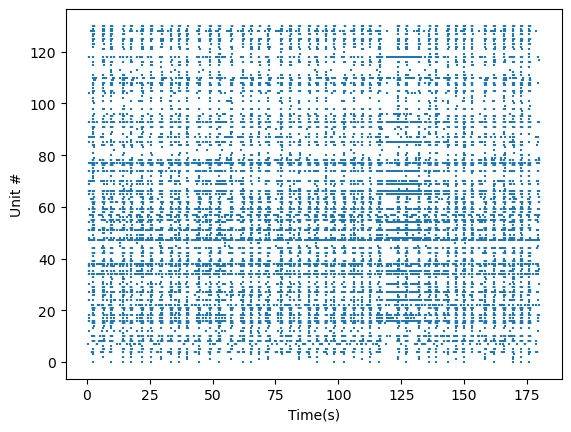

In [14]:
plot_raster(data_control)

# Plot Average Firing Rate over All Units

Count number of spikes

Calculate average firing rate

How much acivity is there in a burst

In [9]:
def raster_analysis(sd, seconds=20):
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()

    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)# in ms
    # Lets smooth this to make it neater
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
    t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax2 = ax.twinx()
    ax2.plot(t,pop_rate_smooth,c='r')

    ax.set_xlim(0,seconds)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax2.set_ylabel('Firing Rate')
    plt.show()

<p>&nbsp</p>

<p>&nbsp</p>

<p>&nbsp</p>

<p>&nbsp</p>

<p>&nbsp</p>

<p>&nbsp</p>

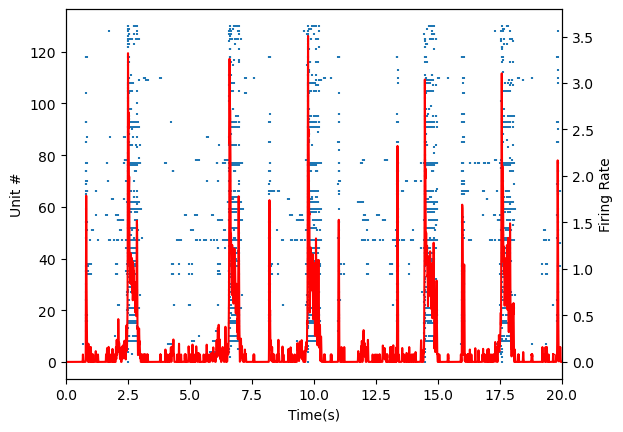

In [15]:
raster_analysis(data_control, 20)

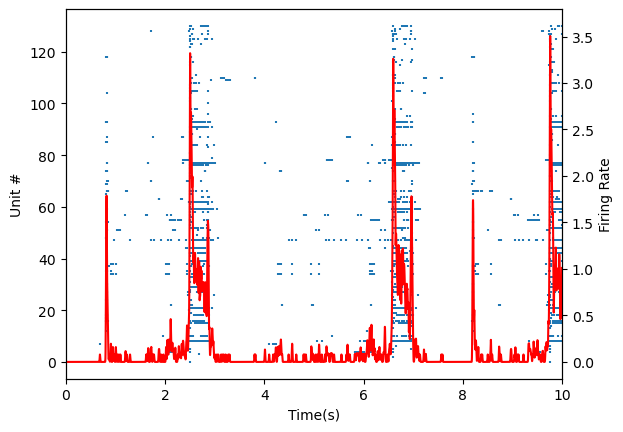

In [12]:
raster_analysis(data_control, 10)

# Interspike-intervals of 2 select neurons

to make htis look good, remove all hte isi's that are over 100, then plot histogram.

ISI is higher for diazapam

Text(0, 0.5, 'ISI count')

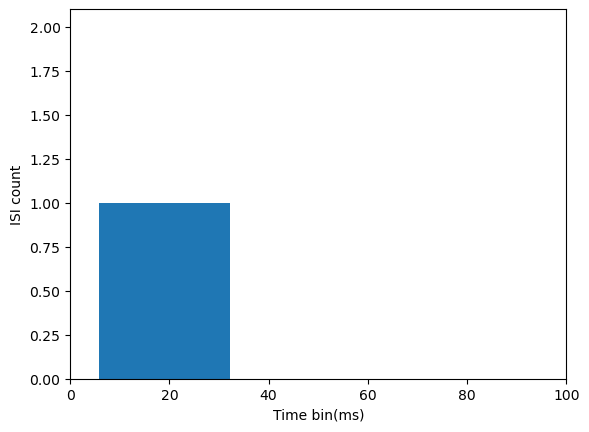

In [56]:
# Interspike-intervals of 2 select neurons
isis = sd.interspike_intervals()
# print(isis[0])
# Plot the first
n_bins = 1000

plt.xlim(0,100)
plt.hist(isis[0],bins=n_bins)
plt.hist(isis[2],bins=n_bins)
plt.xlabel('Time bin(ms)')
plt.ylabel('ISI count')


# <font color="red">CV Score

This is $sd/mean$

if 1 means poission, less than one means less random, 

In [30]:
isis

[array([7.259350e+03, 4.710000e+03, 3.101850e+03, 4.291650e+03,
        3.738550e+03, 7.920400e+03, 5.850000e+00, 3.177800e+03,
        7.794450e+03, 8.086450e+03, 9.479450e+03, 3.239000e+03,
        2.632830e+04, 6.499900e+03, 4.212050e+03, 1.010195e+04,
        3.885700e+03, 1.066655e+04, 9.186550e+03, 2.611450e+03,
        4.671100e+03, 6.345100e+03, 1.195920e+04, 7.719000e+03,
        3.110550e+03, 3.163250e+03]),
 array([10219.2 ,  9004.45,  8554.8 , 11126.55,  3601.8 , 12289.9 ,
        24894.05, 14238.55,  8230.85, 14756.65, 11548.1 , 11334.45]),
 array([ 7873.45,  3101.45,  4292.2 ,  3738.15,  4097.  ,  7006.25,
         3212.2 , 32289.6 , 12291.  ,  3767.15,   418.4 ,  2950.25,
        14435.6 ,  6378.6 , 11180.7 ,  8231.8 ,  4327.4 ,  2610.05,
        11010.6 ,  8356.6 , 11328.05,  3109.85]),
 array([14864.4 , 15864.45,  3293.85,  3156.65,  4702.65,  4407.7 ,
        16291.65,  3272.35,  9040.45,  6942.85,  3724.2 ,  7049.85,
         2926.2 ,  4209.35, 10392.05, 14222.7 , 16

The lesson, diazapam makes it less random

replicatte figure in paper, cor CV score, hint use unit 63, get isi's less than 100

histogram of cv scores

# <font color="orange">Plot spike time latency distribution for pair of units 

What is latency distribution?

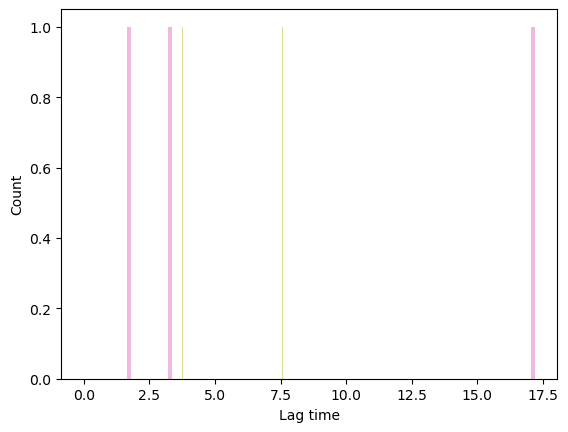

In [33]:
neuron_ind = 7
n_bins = 100

latencies = sd.latencies(sd.train[neuron_ind],window_ms=30)

# Plot latency dist for first 5 neurons
for latency in latencies[10:20]:
    plt.hist(latency, n_bins, alpha=.5)

plt.xlabel('Lag time')
plt.ylabel('Count')
plt.show()
    
    

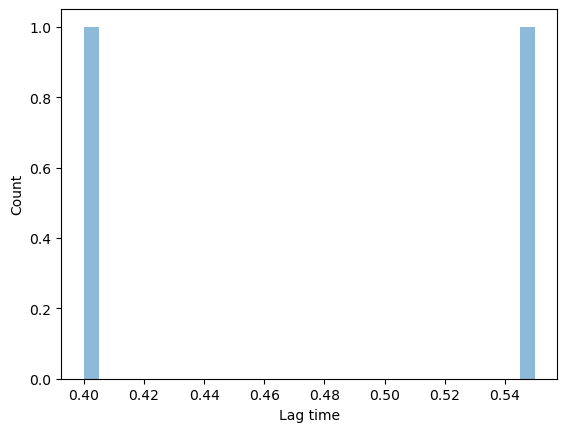

In [31]:
neuron_ind = 25
n_bins = 30



latencies = sd.latencies(sd.train[neuron_ind],window_ms=500)

# Plot latency dist for first 5 neurons
#for latency in latencies[31]:
#    plt.hist(latency, n_bins, alpha=.5)

plt.hist(latencies[35], n_bins, alpha=.5)
plt.xlabel('Lag time')
plt.ylabel('Count')
plt.show()
    
    

In [57]:
correlation

array([1.23793201, 1.25085226, 1.26164762, ..., 1.26952168, 1.26164762,
       1.25085226])

# Compute Correlation Matrix

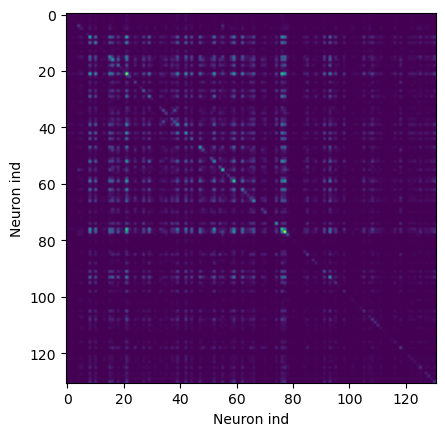

In [22]:
def correlation(sd):
    # Correlation
    corr = np.zeros((sd.N,sd.N)) #inds by inds

    dense_raster = sd.raster(bin_size=1) # in ms
    # Blur it
    sigma = 5
    dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 

    # Correlation at 0 lag
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            corr[i,j] = scipy.signal.correlate(dense_raster[i],dense_raster[j],'valid')

    plt.imshow(corr)
    plt.xlabel("Neuron ind")
    plt.ylabel("Neuron ind")
    plt.show() 
        

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66

11 128
11 129
11 130
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31
12 32
12 33
12 34
12 35
12 36
12 37
12 38
12 39
12 40
12 41
12 42
12 43
12 44
12 45
12 46
12 47
12 48
12 49
12 50
12 51
12 52
12 53
12 54
12 55
12 56
12 57
12 58
12 59
12 60
12 61
12 62
12 63
12 64
12 65
12 66
12 67
12 68
12 69
12 70
12 71
12 72
12 73
12 74
12 75
12 76
12 77
12 78
12 79
12 80
12 81
12 82
12 83
12 84
12 85
12 86
12 87
12 88
12 89
12 90
12 91
12 92
12 93
12 94
12 95
12 96
12 97
12 98
12 99
12 100
12 101
12 102
12 103
12 104
12 105
12 106
12 107
12 108
12 109
12 110
12 111
12 112
12 113
12 114
12 115
12 116
12 117
12 118
12 119
12 120
12 121
12 122
12 123
12 124
12 125
12 126
12 127
12 128
12 129
12 130
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
13 16
13 17
13 18
13 19
13 20
13 21
13 22
13 23
13 24
13 25
13 26
13 27
13 28
13 29
13

22 77
22 78
22 79
22 80
22 81
22 82
22 83
22 84
22 85
22 86
22 87
22 88
22 89
22 90
22 91
22 92
22 93
22 94
22 95
22 96
22 97
22 98
22 99
22 100
22 101
22 102
22 103
22 104
22 105
22 106
22 107
22 108
22 109
22 110
22 111
22 112
22 113
22 114
22 115
22 116
22 117
22 118
22 119
22 120
22 121
22 122
22 123
22 124
22 125
22 126
22 127
22 128
22 129
22 130
23 0
23 1
23 2
23 3
23 4
23 5
23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 14
23 15
23 16
23 17
23 18
23 19
23 20
23 21
23 22
23 23
23 24
23 25
23 26
23 27
23 28
23 29
23 30
23 31
23 32
23 33
23 34
23 35
23 36
23 37
23 38
23 39
23 40
23 41
23 42
23 43
23 44
23 45
23 46
23 47
23 48
23 49
23 50
23 51
23 52
23 53
23 54
23 55
23 56
23 57
23 58
23 59
23 60
23 61
23 62
23 63
23 64
23 65
23 66
23 67
23 68
23 69
23 70
23 71
23 72
23 73
23 74
23 75
23 76
23 77
23 78
23 79
23 80
23 81
23 82
23 83
23 84
23 85
23 86
23 87
23 88
23 89
23 90
23 91
23 92
23 93
23 94
23 95
23 96
23 97
23 98
23 99
23 100
23 101
23 102
23 103
23 104
23 105
23 106
23 107

33 5
33 6
33 7
33 8
33 9
33 10
33 11
33 12
33 13
33 14
33 15
33 16
33 17
33 18
33 19
33 20
33 21
33 22
33 23
33 24
33 25
33 26
33 27
33 28
33 29
33 30
33 31
33 32
33 33
33 34
33 35
33 36
33 37
33 38
33 39
33 40
33 41
33 42
33 43
33 44
33 45
33 46
33 47
33 48
33 49
33 50
33 51
33 52
33 53
33 54
33 55
33 56
33 57
33 58
33 59
33 60
33 61
33 62
33 63
33 64
33 65
33 66
33 67
33 68
33 69
33 70
33 71
33 72
33 73
33 74
33 75
33 76
33 77
33 78
33 79
33 80
33 81
33 82
33 83
33 84
33 85
33 86
33 87
33 88
33 89
33 90
33 91
33 92
33 93
33 94
33 95
33 96
33 97
33 98
33 99
33 100
33 101
33 102
33 103
33 104
33 105
33 106
33 107
33 108
33 109
33 110
33 111
33 112
33 113
33 114
33 115
33 116
33 117
33 118
33 119
33 120
33 121
33 122
33 123
33 124
33 125
33 126
33 127
33 128
33 129
33 130
34 0
34 1
34 2
34 3
34 4
34 5
34 6
34 7
34 8
34 9
34 10
34 11
34 12
34 13
34 14
34 15
34 16
34 17
34 18
34 19
34 20
34 21
34 22
34 23
34 24
34 25
34 26
34 27
34 28
34 29
34 30
34 31
34 32
34 33
34 34
34 35
34 36
34 37


43 57
43 58
43 59
43 60
43 61
43 62
43 63
43 64
43 65
43 66
43 67
43 68
43 69
43 70
43 71
43 72
43 73
43 74
43 75
43 76
43 77
43 78
43 79
43 80
43 81
43 82
43 83
43 84
43 85
43 86
43 87
43 88
43 89
43 90
43 91
43 92
43 93
43 94
43 95
43 96
43 97
43 98
43 99
43 100
43 101
43 102
43 103
43 104
43 105
43 106
43 107
43 108
43 109
43 110
43 111
43 112
43 113
43 114
43 115
43 116
43 117
43 118
43 119
43 120
43 121
43 122
43 123
43 124
43 125
43 126
43 127
43 128
43 129
43 130
44 0
44 1
44 2
44 3
44 4
44 5
44 6
44 7
44 8
44 9
44 10
44 11
44 12
44 13
44 14
44 15
44 16
44 17
44 18
44 19
44 20
44 21
44 22
44 23
44 24
44 25
44 26
44 27
44 28
44 29
44 30
44 31
44 32
44 33
44 34
44 35
44 36
44 37
44 38
44 39
44 40
44 41
44 42
44 43
44 44
44 45
44 46
44 47
44 48
44 49
44 50
44 51
44 52
44 53
44 54
44 55
44 56
44 57
44 58
44 59
44 60
44 61
44 62
44 63
44 64
44 65
44 66
44 67
44 68
44 69
44 70
44 71
44 72
44 73
44 74
44 75
44 76
44 77
44 78
44 79
44 80
44 81
44 82
44 83
44 84
44 85
44 86
44 87
44 88
4

53 101
53 102
53 103
53 104
53 105
53 106
53 107
53 108
53 109
53 110
53 111
53 112
53 113
53 114
53 115
53 116
53 117
53 118
53 119
53 120
53 121
53 122
53 123
53 124
53 125
53 126
53 127
53 128
53 129
53 130
54 0
54 1
54 2
54 3
54 4
54 5
54 6
54 7
54 8
54 9
54 10
54 11
54 12
54 13
54 14
54 15
54 16
54 17
54 18
54 19
54 20
54 21
54 22
54 23
54 24
54 25
54 26
54 27
54 28
54 29
54 30
54 31
54 32
54 33
54 34
54 35
54 36
54 37
54 38
54 39
54 40
54 41
54 42
54 43
54 44
54 45
54 46
54 47
54 48
54 49
54 50
54 51
54 52
54 53
54 54
54 55
54 56
54 57
54 58
54 59
54 60
54 61
54 62
54 63
54 64
54 65
54 66
54 67
54 68
54 69
54 70
54 71
54 72
54 73
54 74
54 75
54 76
54 77
54 78
54 79
54 80
54 81
54 82
54 83
54 84
54 85
54 86
54 87
54 88
54 89
54 90
54 91
54 92
54 93
54 94
54 95
54 96
54 97
54 98
54 99
54 100
54 101
54 102
54 103
54 104
54 105
54 106
54 107
54 108
54 109
54 110
54 111
54 112
54 113
54 114
54 115
54 116
54 117
54 118
54 119
54 120
54 121
54 122
54 123
54 124
54 125
54 126
54 127
54 1

63 130
64 0
64 1
64 2
64 3
64 4
64 5
64 6
64 7
64 8
64 9
64 10
64 11
64 12
64 13
64 14
64 15
64 16
64 17
64 18
64 19
64 20
64 21
64 22
64 23
64 24
64 25
64 26
64 27
64 28
64 29
64 30
64 31
64 32
64 33
64 34
64 35
64 36
64 37
64 38
64 39
64 40
64 41
64 42
64 43
64 44
64 45
64 46
64 47
64 48
64 49
64 50
64 51
64 52
64 53
64 54
64 55
64 56
64 57
64 58
64 59
64 60
64 61
64 62
64 63
64 64
64 65
64 66
64 67
64 68
64 69
64 70
64 71
64 72
64 73
64 74
64 75
64 76
64 77
64 78
64 79
64 80
64 81
64 82
64 83
64 84
64 85
64 86
64 87
64 88
64 89
64 90
64 91
64 92
64 93
64 94
64 95
64 96
64 97
64 98
64 99
64 100
64 101
64 102
64 103
64 104
64 105
64 106
64 107
64 108
64 109
64 110
64 111
64 112
64 113
64 114
64 115
64 116
64 117
64 118
64 119
64 120
64 121
64 122
64 123
64 124
64 125
64 126
64 127
64 128
64 129
64 130
65 0
65 1
65 2
65 3
65 4
65 5
65 6
65 7
65 8
65 9
65 10
65 11
65 12
65 13
65 14
65 15
65 16
65 17
65 18
65 19
65 20
65 21
65 22
65 23
65 24
65 25
65 26
65 27
65 28
65 29
65 30
65 31
65 3

74 24
74 25
74 26
74 27
74 28
74 29
74 30
74 31
74 32
74 33
74 34
74 35
74 36
74 37
74 38
74 39
74 40
74 41
74 42
74 43
74 44
74 45
74 46
74 47
74 48
74 49
74 50
74 51
74 52
74 53
74 54
74 55
74 56
74 57
74 58
74 59
74 60
74 61
74 62
74 63
74 64
74 65
74 66
74 67
74 68
74 69
74 70
74 71
74 72
74 73
74 74
74 75
74 76
74 77
74 78
74 79
74 80
74 81
74 82
74 83
74 84
74 85
74 86
74 87
74 88
74 89
74 90
74 91
74 92
74 93
74 94
74 95
74 96
74 97
74 98
74 99
74 100
74 101
74 102
74 103
74 104
74 105
74 106
74 107
74 108
74 109
74 110
74 111
74 112
74 113
74 114
74 115
74 116
74 117
74 118
74 119
74 120
74 121
74 122
74 123
74 124
74 125
74 126
74 127
74 128
74 129
74 130
75 0
75 1
75 2
75 3
75 4
75 5
75 6
75 7
75 8
75 9
75 10
75 11
75 12
75 13
75 14
75 15
75 16
75 17
75 18
75 19
75 20
75 21
75 22
75 23
75 24
75 25
75 26
75 27
75 28
75 29
75 30
75 31
75 32
75 33
75 34
75 35
75 36
75 37
75 38
75 39
75 40
75 41
75 42
75 43
75 44
75 45
75 46
75 47
75 48
75 49
75 50
75 51
75 52
75 53
75 54
75 55
7

84 50
84 51
84 52
84 53
84 54
84 55
84 56
84 57
84 58
84 59
84 60
84 61
84 62
84 63
84 64
84 65
84 66
84 67
84 68
84 69
84 70
84 71
84 72
84 73
84 74
84 75
84 76
84 77
84 78
84 79
84 80
84 81
84 82
84 83
84 84
84 85
84 86
84 87
84 88
84 89
84 90
84 91
84 92
84 93
84 94
84 95
84 96
84 97
84 98
84 99
84 100
84 101
84 102
84 103
84 104
84 105
84 106
84 107
84 108
84 109
84 110
84 111
84 112
84 113
84 114
84 115
84 116
84 117
84 118
84 119
84 120
84 121
84 122
84 123
84 124
84 125
84 126
84 127
84 128
84 129
84 130
85 0
85 1
85 2
85 3
85 4
85 5
85 6
85 7
85 8
85 9
85 10
85 11
85 12
85 13
85 14
85 15
85 16
85 17
85 18
85 19
85 20
85 21
85 22
85 23
85 24
85 25
85 26
85 27
85 28
85 29
85 30
85 31
85 32
85 33
85 34
85 35
85 36
85 37
85 38
85 39
85 40
85 41
85 42
85 43
85 44
85 45
85 46
85 47
85 48
85 49
85 50
85 51
85 52
85 53
85 54
85 55
85 56
85 57
85 58
85 59
85 60
85 61
85 62
85 63
85 64
85 65
85 66
85 67
85 68
85 69
85 70
85 71
85 72
85 73
85 74
85 75
85 76
85 77
85 78
85 79
85 80
85 81
8

94 93
94 94
94 95
94 96
94 97
94 98
94 99
94 100
94 101
94 102
94 103
94 104
94 105
94 106
94 107
94 108
94 109
94 110
94 111
94 112
94 113
94 114
94 115
94 116
94 117
94 118
94 119
94 120
94 121
94 122
94 123
94 124
94 125
94 126
94 127
94 128
94 129
94 130
95 0
95 1
95 2
95 3
95 4
95 5
95 6
95 7
95 8
95 9
95 10
95 11
95 12
95 13
95 14
95 15
95 16
95 17
95 18
95 19
95 20
95 21
95 22
95 23
95 24
95 25
95 26
95 27
95 28
95 29
95 30
95 31
95 32
95 33
95 34
95 35
95 36
95 37
95 38
95 39
95 40
95 41
95 42
95 43
95 44
95 45
95 46
95 47
95 48
95 49
95 50
95 51
95 52
95 53
95 54
95 55
95 56
95 57
95 58
95 59
95 60
95 61
95 62
95 63
95 64
95 65
95 66
95 67
95 68
95 69
95 70
95 71
95 72
95 73
95 74
95 75
95 76
95 77
95 78
95 79
95 80
95 81
95 82
95 83
95 84
95 85
95 86
95 87
95 88
95 89
95 90
95 91
95 92
95 93
95 94
95 95
95 96
95 97
95 98
95 99
95 100
95 101
95 102
95 103
95 104
95 105
95 106
95 107
95 108
95 109
95 110
95 111
95 112
95 113
95 114
95 115
95 116
95 117
95 118
95 119
95 120
95 1

104 73
104 74
104 75
104 76
104 77
104 78
104 79
104 80
104 81
104 82
104 83
104 84
104 85
104 86
104 87
104 88
104 89
104 90
104 91
104 92
104 93
104 94
104 95
104 96
104 97
104 98
104 99
104 100
104 101
104 102
104 103
104 104
104 105
104 106
104 107
104 108
104 109
104 110
104 111
104 112
104 113
104 114
104 115
104 116
104 117
104 118
104 119
104 120
104 121
104 122
104 123
104 124
104 125
104 126
104 127
104 128
104 129
104 130
105 0
105 1
105 2
105 3
105 4
105 5
105 6
105 7
105 8
105 9
105 10
105 11
105 12
105 13
105 14
105 15
105 16
105 17
105 18
105 19
105 20
105 21
105 22
105 23
105 24
105 25
105 26
105 27
105 28
105 29
105 30
105 31
105 32
105 33
105 34
105 35
105 36
105 37
105 38
105 39
105 40
105 41
105 42
105 43
105 44
105 45
105 46
105 47
105 48
105 49
105 50
105 51
105 52
105 53
105 54
105 55
105 56
105 57
105 58
105 59
105 60
105 61
105 62
105 63
105 64
105 65
105 66
105 67
105 68
105 69
105 70
105 71
105 72
105 73
105 74
105 75
105 76
105 77
105 78
105 79
105 80
105 81

113 108
113 109
113 110
113 111
113 112
113 113
113 114
113 115
113 116
113 117
113 118
113 119
113 120
113 121
113 122
113 123
113 124
113 125
113 126
113 127
113 128
113 129
113 130
114 0
114 1
114 2
114 3
114 4
114 5
114 6
114 7
114 8
114 9
114 10
114 11
114 12
114 13
114 14
114 15
114 16
114 17
114 18
114 19
114 20
114 21
114 22
114 23
114 24
114 25
114 26
114 27
114 28
114 29
114 30
114 31
114 32
114 33
114 34
114 35
114 36
114 37
114 38
114 39
114 40
114 41
114 42
114 43
114 44
114 45
114 46
114 47
114 48
114 49
114 50
114 51
114 52
114 53
114 54
114 55
114 56
114 57
114 58
114 59
114 60
114 61
114 62
114 63
114 64
114 65
114 66
114 67
114 68
114 69
114 70
114 71
114 72
114 73
114 74
114 75
114 76
114 77
114 78
114 79
114 80
114 81
114 82
114 83
114 84
114 85
114 86
114 87
114 88
114 89
114 90
114 91
114 92
114 93
114 94
114 95
114 96
114 97
114 98
114 99
114 100
114 101
114 102
114 103
114 104
114 105
114 106
114 107
114 108
114 109
114 110
114 111
114 112
114 113
114 114
114 11

122 74
122 75
122 76
122 77
122 78
122 79
122 80
122 81
122 82
122 83
122 84
122 85
122 86
122 87
122 88
122 89
122 90
122 91
122 92
122 93
122 94
122 95
122 96
122 97
122 98
122 99
122 100
122 101
122 102
122 103
122 104
122 105
122 106
122 107
122 108
122 109
122 110
122 111
122 112
122 113
122 114
122 115
122 116
122 117
122 118
122 119
122 120
122 121
122 122
122 123
122 124
122 125
122 126
122 127
122 128
122 129
122 130
123 0
123 1
123 2
123 3
123 4
123 5
123 6
123 7
123 8
123 9
123 10
123 11
123 12
123 13
123 14
123 15
123 16
123 17
123 18
123 19
123 20
123 21
123 22
123 23
123 24
123 25
123 26
123 27
123 28
123 29
123 30
123 31
123 32
123 33
123 34
123 35
123 36
123 37
123 38
123 39
123 40
123 41
123 42
123 43
123 44
123 45
123 46
123 47
123 48
123 49
123 50
123 51
123 52
123 53
123 54
123 55
123 56
123 57
123 58
123 59
123 60
123 61
123 62
123 63
123 64
123 65
123 66
123 67
123 68
123 69
123 70
123 71
123 72
123 73
123 74
123 75
123 76
123 77
123 78
123 79
123 80
123 81
123 82

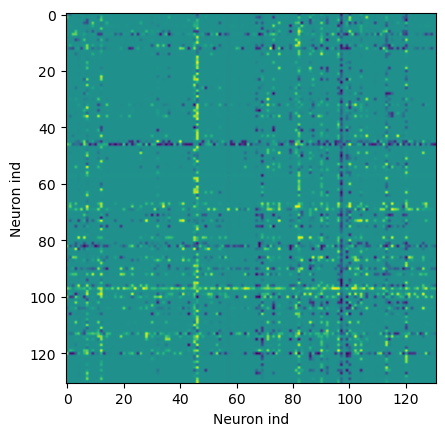

In [23]:
# # Correlation
# corr = np.zeros((sd.N,sd.N)) #inds by inds

# dense_raster = sd.raster(bin_size=5) # in ms
# # Blur it
# sigma = 5
# dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 

# # Compute lag times
# lag_mat = np.zeros((sd.N,sd.N))

# for i in range(corr.shape[0]):
#     for j in range(corr.shape[1]):
#         correlation = scipy.signal.correlate(dense_raster[i], dense_raster[j], mode="same")
#         lags = scipy.signal.correlation_lags(dense_raster[i].size, dense_raster[j].size, mode="same")
#         lag = lags[np.argmax(correlation)]
#         lag_mat[i,j] = lag
#         #print(i,j)

# plt.imshow(lag_mat)
# plt.xlabel("Neuron ind")
# plt.ylabel("Neuron ind")
# plt.show() 


In [24]:
# dense_raster[0].shape

(35976,)

# Compute Spike Time Tiling

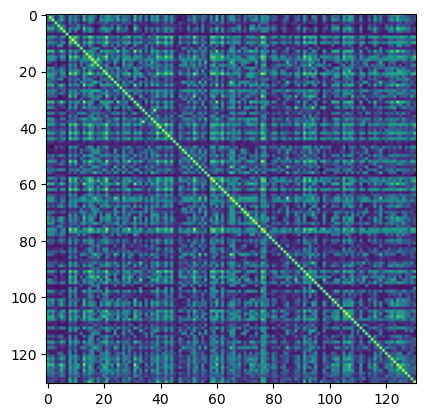

In [58]:
# Compute Spike time tiling
delt = 20
stts = sd.spike_time_tilings(delt)

# Show matrix as heatmap
plt.imshow(stts)
#plt.xlabel("Neuron ind")
#plt.ylabel("Neuron ind")
plt.show()

What's teh value of the diagaonal line. Why?

There's a higher correlation score for diazapam, this is why it's brighter

This relates back to teh CV scores, beecaue units that are less random with each other are intuitively more correlated